Olá, Wail

Meu nome é Felipe. Fico feliz em revisar seu projeto. Ao ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberto a feedbacks e discussões sobre o tema.

Vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser consertado, caso contrário seu projeto **não** será aceito.
</div>

Você pode me responder usando isso:
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
    Projeto foi atualizado
</div>

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Ok. As correções foram realizadas, o dash e apresentação adicionados. Parabéns por ter chegado até aqui.
</div>

# E-Commerce: Identify Consumer Profiles

## Exploratory Data Analysis (EDA)

### Initialization

In [35]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns

### Load Data

In [2]:
# Load the dataset
ecommerce = pd.read_csv('/datasets/ecommerce_dataset_us.csv', sep = '\t')
ecommerce

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,11/29/2018 08:26,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,11/29/2018 08:26,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,11/29/2018 08:26,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,11/29/2018 08:26,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,11/29/2018 08:26,3.39,17850.0
...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/07/2019 12:50,0.85,12680.0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/07/2019 12:50,2.10,12680.0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/07/2019 12:50,4.15,12680.0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/07/2019 12:50,4.15,12680.0


The dataset consist of 7 columns each with 541909 values. To make it more accurate for analysis will make columns name into lowercase.

In [3]:
# Convert column names to lowercase
ecommerce.columns = ecommerce.columns.str.lower()

# Check the first few rows to confirm
ecommerce.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,11/29/2018 08:26,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,11/29/2018 08:26,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,11/29/2018 08:26,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,11/29/2018 08:26,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,11/29/2018 08:26,3.39,17850.0


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Ok.
</div>

### Check for data types

In [4]:
# Check data types
print("\nData Types for Ecommerce:\n", ecommerce.dtypes)


Data Types for Ecommerce:
 invoiceno       object
stockcode       object
description     object
quantity         int64
invoicedate     object
unitprice      float64
customerid     float64
dtype: object


As we can see there is invoicedate column which is related to time, so in this case will convert the type of data into datetime. 

In [5]:
# Convert necessary columns to datetime
ecommerce['invoicedate'] = pd.to_datetime(ecommerce['invoicedate'])

# Confirm data type changes
print("\nUpdated Data Types for Ecommerce :\n")
ecommerce.info()


Updated Data Types for Ecommerce :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoiceno    541909 non-null  object        
 1   stockcode    541909 non-null  object        
 2   description  540455 non-null  object        
 3   quantity     541909 non-null  int64         
 4   invoicedate  541909 non-null  datetime64[ns]
 5   unitprice    541909 non-null  float64       
 6   customerid   406829 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 28.9+ MB


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Ok.
</div>

###  Check for missing values

In [6]:
# Check for missing values
print("Missing values in Ecommerce:\n", ecommerce.isnull().sum())

Missing values in Ecommerce:
 invoiceno           0
stockcode           0
description      1454
quantity            0
invoicedate         0
unitprice           0
customerid     135080
dtype: int64


After analysis 1454 missing values were found in the description column and 135080 in the customerid column.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Ok.
</div>

In [7]:
# Filter data for stcokcodes with null description
stockcodes_null_description = ecommerce.query('description.isnull()')
stockcodes_null_description

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid
622,536414,22139,NaN,56,2018-11-29 11:52:00,0.0,NaN
1970,536545,21134,NaN,1,2018-11-29 14:32:00,0.0,NaN
1971,536546,22145,NaN,1,2018-11-29 14:33:00,0.0,NaN
1972,536547,37509,NaN,1,2018-11-29 14:33:00,0.0,NaN
1987,536549,85226A,NaN,1,2018-11-29 14:34:00,0.0,NaN
...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2019-12-05 18:26:00,0.0,NaN
535326,581203,23406,NaN,15,2019-12-05 18:31:00,0.0,NaN
535332,581209,21620,NaN,6,2019-12-05 18:35:00,0.0,NaN
536981,581234,72817,NaN,27,2019-12-06 10:33:00,0.0,NaN


In [8]:
# Number of unique stockcodes with null description
nan_stockcodes = ecommerce[ecommerce['description'].isna()]['stockcode']
print('Number of unique stockcodes with null description:', nan_stockcodes.nunique())

Number of unique stockcodes with null description: 960


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Ok.
</div>

In [9]:
#Example of description carrying same stcokcode
stockcode = ecommerce.query("stockcode == '22139'")
stockcode.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid
106,536381,22139,RETROSPOT TEA SET CERAMIC 11 PC,23,2018-11-29 09:41:00,4.25,15311.0
622,536414,22139,NaN,56,2018-11-29 11:52:00,0.00,NaN
6392,536942,22139,amazon,15,2018-12-01 12:08:00,0.00,NaN
6885,536982,22139,RETROSPOT TEA SET CERAMIC 11 PC,10,2018-12-01 14:27:00,11.02,NaN
7203,537011,22139,NaN,-5,2018-12-01 15:38:00,0.00,NaN


In [10]:
# Get the most common description for each stockcode
description_filled = ecommerce.groupby('stockcode')['description'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

# Fill the NaN values in 'description' with the determined ones
ecommerce['description'] = ecommerce.apply(
    lambda row: description_filled[row['stockcode']] if pd.isna(row['description']) else row['description'],
    axis=1
)

# Replace 'amazon' descriptions with the most common description for stockcode '22139'
ecommerce.loc[(ecommerce['stockcode'] == '22139') & (ecommerce['description'] == 'amazon'), 'description'] = description_filled['22139']

# Verify changes
stockcode = ecommerce.query("stockcode == '22139'")
stockcode.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid
106,536381,22139,RETROSPOT TEA SET CERAMIC 11 PC,23,2018-11-29 09:41:00,4.25,15311.0
622,536414,22139,RETROSPOT TEA SET CERAMIC 11 PC,56,2018-11-29 11:52:00,0.00,NaN
6392,536942,22139,RETROSPOT TEA SET CERAMIC 11 PC,15,2018-12-01 12:08:00,0.00,NaN
6885,536982,22139,RETROSPOT TEA SET CERAMIC 11 PC,10,2018-12-01 14:27:00,11.02,NaN
7203,537011,22139,RETROSPOT TEA SET CERAMIC 11 PC,-5,2018-12-01 15:38:00,0.00,NaN


In [11]:
# Get unique invoiceno with null customerid
null_customer_invoiceno = ecommerce[ecommerce['customerid'].isna()]['invoiceno'].unique()
print("Invoiceno with null customerid:\n", null_customer_invoiceno)

# Check for non-null customerid for these invoiceno
non_null_customerid_check = ecommerce[ecommerce['invoiceno'].isin(null_customer_invoiceno) & ecommerce['customerid'].notna()]

print("\nInvoiceno with null customerid but have corresponding non-null customerid:", non_null_customerid_check)

Invoiceno with null customerid:
 ['536414' '536544' '536545' ... '581492' '581497' '581498']

Invoiceno with null customerid but have corresponding non-null customerid: Empty DataFrame
Columns: [invoiceno, stockcode, description, quantity, invoicedate, unitprice, customerid]
Index: []


There are no invoiceno with null customerid which have corresponding non-null customerid, so we can't fill cusotmerid values according to invoiceno

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Ok.
</div>

In [12]:
# Check again
ecommerce.isnull().sum()

invoiceno           0
stockcode           0
description       112
quantity            0
invoicedate         0
unitprice           0
customerid     135080
dtype: int64

We can see that around 25% of customerid has no values, but there is still enough data to continue the analysis so we can remove these data

In [13]:
# Remove rows where 'customerid' is null
ecommerce = ecommerce.dropna(subset=['customerid']).reset_index(drop=True)
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406829 entries, 0 to 406828
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoiceno    406829 non-null  object        
 1   stockcode    406829 non-null  object        
 2   description  406829 non-null  object        
 3   quantity     406829 non-null  int64         
 4   invoicedate  406829 non-null  datetime64[ns]
 5   unitprice    406829 non-null  float64       
 6   customerid   406829 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 21.7+ MB


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Ok.
</div>

### Check for duplicates

In [14]:
# Check for duplicates
duplicates_specific = ecommerce[ecommerce.duplicated(keep = False)]
print("Duplicate rows in Ecommerce: \n", duplicates_specific)

Duplicate rows in Ecommerce: 
        invoiceno stockcode                       description  quantity  \
485       536409     22111      SCOTTIE DOG HOT WATER BOTTLE         1   
489       536409     22866     HAND WARMER SCOTTY DOG DESIGN         1   
494       536409     21866       UNION JACK FLAG LUGGAGE TAG         1   
517       536409     21866       UNION JACK FLAG LUGGAGE TAG         1   
521       536409     22900   SET 2 TEA TOWELS I LOVE LONDON          1   
...          ...       ...                               ...       ...   
406595    581538     22068       BLACK PIRATE TREASURE CHEST         1   
406609    581538     23318    BOX OF 6 MINI VINTAGE CRACKERS         1   
406612    581538     22992            REVOLVER WOODEN RULER          1   
406619    581538     22694                      WICKER STAR          1   
406621    581538     23343      JUMBO BAG VINTAGE CHRISTMAS          1   

               invoicedate  unitprice  customerid  
485    2018-11-29 11:45:00  

In [46]:
# Remove duplicate rows based on all columns, keeping the first occurrence
ecommerce = ecommerce.drop_duplicates(subset=['stockcode', 'quantity', 'invoicedate', 'unitprice', 'customerid']).reset_index(drop=True)

# Save the DataFrame to a CSV file
ecommerce.to_csv('ecommerce_data_updated.csv', index=False)
print("File saved successfully!")

ecommerce

File saved successfully!


,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,total_revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850.0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850.0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850.0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850.0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850.0,20.34
...,...,...,...,...,...,...,...,...
401557,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2019-12-07 12:50:00,0.85,12680.0,10.20
401558,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2019-12-07 12:50:00,2.10,12680.0,12.60
401559,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2019-12-07 12:50:00,4.15,12680.0,16.60
401560,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2019-12-07 12:50:00,4.15,12680.0,16.60


The number of lines was 406829, after removing duplicates (5225) it became 401562 which means just 1.3% of data was removed whic is considered affordable

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Após remover duplicados, qual % de linhas foram removidas em relação ao total?
</div>

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Ok.
</div>

### Check additional information

In [16]:
ecommerce.query("quantity < 0").count()

invoiceno      8872
stockcode      8872
description    8872
quantity       8872
invoicedate    8872
unitprice      8872
customerid     8872
dtype: int64

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Ok.
</div>

In [17]:
ecommerce.query("quantity < 0 and invoiceno.str.startswith('C')")

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid
141,C536379,D,Discount,-1,2018-11-29 09:41:00,27.50,14527.0
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2018-11-29 09:49:00,4.65,15311.0
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2018-11-29 10:24:00,1.65,17548.0
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2018-11-29 10:24:00,0.29,17548.0
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2018-11-29 10:24:00,0.29,17548.0
...,...,...,...,...,...,...,...
401117,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2019-12-07 09:57:00,0.83,14397.0
401201,C581499,M,Manual,-1,2019-12-07 10:28:00,224.69,15498.0
401368,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2019-12-07 11:57:00,10.95,15311.0
401369,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2019-12-07 11:58:00,1.25,17315.0


We can notice that products with negative quantity has invoiceno starting with C which can rfrs to return or refund

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Ok.
</div>

## Segmentation of Users

### Group customers into distinct segments based on their purchases. This can lead to more personalized marketing strategies.

In [18]:
# Grouping by customerid to get relevant metrics
ecommerce['total_revenue'] = ecommerce['unitprice'] * ecommerce['quantity']

customer_summary = ecommerce.groupby('customerid').agg(
    total_quantity=('quantity', 'sum'),            # Total quantity purchased
    total_invoices=('invoiceno', 'nunique'),       # Unique number of invoices
    total_revenue = (('total_revenue'), 'sum'),    # Total revenue per customer
    latest_purchase_date=('invoicedate', 'max'),   # Latest purchase date
    first_purchase_date=('invoicedate', 'min')     # First purchase date
).reset_index()


# Calculate days since first purchase and days since last purchase
customer_summary['days_since_first_purchase'] = (customer_summary['latest_purchase_date'] - customer_summary['first_purchase_date']).dt.days

# Segment customers based on days since the first purchase
def segment_customer(days):
    if days <= 30:
        return 'New Customer'
    elif 31 <= days <= 100:
        return 'Frequent Customer'
    else:
        return 'Non-Frequent Customer'

# Apply the segmentation
customer_summary['customer_segment'] = customer_summary['days_since_first_purchase'].apply(segment_customer)

customer_summary

,customerid,total_quantity,total_invoices,total_revenue,latest_purchase_date,first_purchase_date,days_since_first_purchase,customer_segment
0,12346.0,0,2,0.00,2019-01-16 10:17:00,2019-01-16 10:01:00,0,New Customer
1,12347.0,2458,7,4310.00,2019-12-05 15:52:00,2018-12-05 14:57:00,365,Non-Frequent Customer
2,12348.0,2341,4,1797.24,2019-09-23 13:13:00,2018-12-14 19:09:00,282,Non-Frequent Customer
3,12349.0,631,1,1757.55,2019-11-19 09:51:00,2019-11-19 09:51:00,0,New Customer
4,12350.0,197,1,334.40,2019-01-31 16:01:00,2019-01-31 16:01:00,0,New Customer
...,...,...,...,...,...,...,...,...
4367,18280.0,45,1,180.60,2019-03-05 09:52:00,2019-03-05 09:52:00,0,New Customer
4368,18281.0,54,1,80.82,2019-06-10 10:53:00,2019-06-10 10:53:00,0,New Customer
4369,18282.0,98,3,176.60,2019-11-30 11:43:00,2019-08-03 13:35:00,118,Non-Frequent Customer
4370,18283.0,1357,16,2045.53,2019-12-04 12:02:00,2019-01-04 14:14:00,333,Non-Frequent Customer


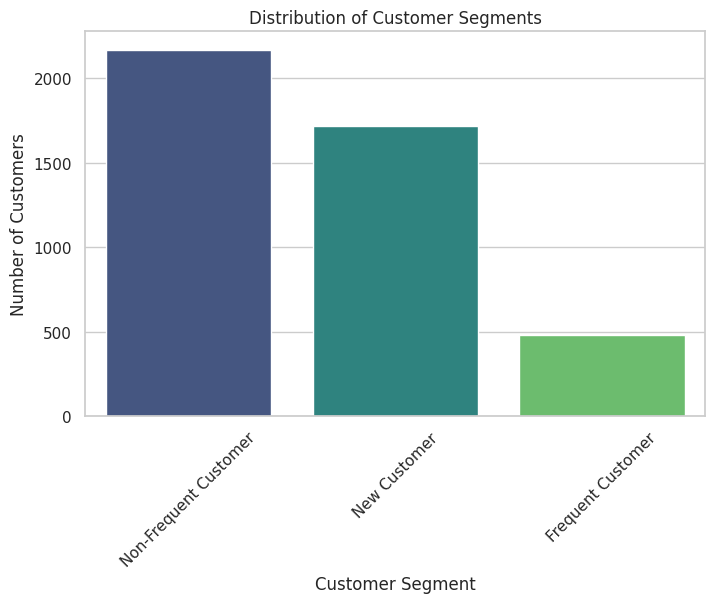

In [19]:
# Count the number of customers in each segment
customer_segment_counts = customer_summary['customer_segment'].value_counts().reset_index()
customer_segment_counts.columns = ['customer_segment', 'count']

# Set the aesthetics for the plot
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(8, 5))
sns.barplot(data=customer_segment_counts, x='customer_segment', y='count', palette='viridis')
plt.title('Distribution of Customer Segments')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

The Non-Frequent Customer segment has the highest number of customers, exceeding 2,000 individuals. This suggests that a large proportion of the customer base does not frequently engage with the business, which could indicate a need for targeted marketing strategies to convert them into more regular customers.

The New Customer segment accounts for a substantial number of customers, likely around 1,500. This indicates that the business is successfully attracting new customers, which is a positive sign for growth. However, retaining these customers is crucial to long-term success.

The Frequent Customer segment has the lowest number of customers, with fewer than 500 individuals. This may highlight a significant opportunity for improvement in customer loyalty programs, as these customers represent a valuable asset for repeat business.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Ok.
</div>

### Segment by spending behavior: Separate customers into groups like high-spenders, moderate spenders, and low spenders.

In [20]:
# Define the spending categories
def categorize_spending(row):
    if row <= 500:
        return 'Low Spender'
    elif row <= 1500:
        return 'Moderate Spender'
    else:
        return 'High Spender'

# Apply the categorization
customer_summary['spending_category'] = customer_summary['total_revenue'].apply(categorize_spending)

customer_summary

,customerid,total_quantity,total_invoices,total_revenue,latest_purchase_date,first_purchase_date,days_since_first_purchase,customer_segment,spending_category
0,12346.0,0,2,0.00,2019-01-16 10:17:00,2019-01-16 10:01:00,0,New Customer,Low Spender
1,12347.0,2458,7,4310.00,2019-12-05 15:52:00,2018-12-05 14:57:00,365,Non-Frequent Customer,High Spender
2,12348.0,2341,4,1797.24,2019-09-23 13:13:00,2018-12-14 19:09:00,282,Non-Frequent Customer,High Spender
3,12349.0,631,1,1757.55,2019-11-19 09:51:00,2019-11-19 09:51:00,0,New Customer,High Spender
4,12350.0,197,1,334.40,2019-01-31 16:01:00,2019-01-31 16:01:00,0,New Customer,Low Spender
...,...,...,...,...,...,...,...,...,...
4367,18280.0,45,1,180.60,2019-03-05 09:52:00,2019-03-05 09:52:00,0,New Customer,Low Spender
4368,18281.0,54,1,80.82,2019-06-10 10:53:00,2019-06-10 10:53:00,0,New Customer,Low Spender
4369,18282.0,98,3,176.60,2019-11-30 11:43:00,2019-08-03 13:35:00,118,Non-Frequent Customer,Low Spender
4370,18283.0,1357,16,2045.53,2019-12-04 12:02:00,2019-01-04 14:14:00,333,Non-Frequent Customer,High Spender


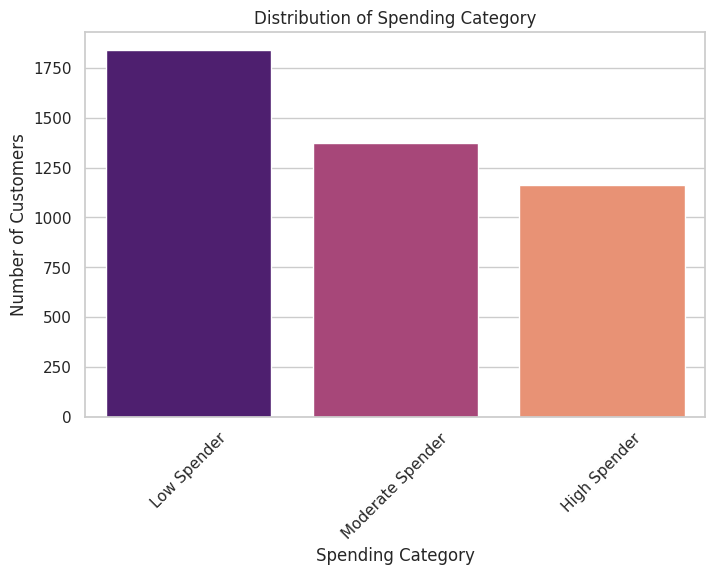

In [21]:
# Count the number of customers in each spending category
spending_counts = customer_summary['spending_category'].value_counts().reset_index()
spending_counts.columns = ['spending_category', 'count']

# Set the aesthetics for the plot
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(8, 5))
sns.barplot(data=spending_counts, x='spending_category', y='count', palette='magma')
plt.title('Distribution of Spending Category')
plt.xlabel('Spending Category')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

The Low Spender category has the highest number of customers, with approximately 1,750 individuals. This indicates that a significant portion of the customer base spends less, which could imply price sensitivity or a preference for budget-friendly options.

The Moderate Spender category has around 1,250 customers. This group is smaller than the low spenders but still constitutes a substantial part of the customer base, suggesting a middle-ground approach to spending.

The High Spender category has the least number of customers, approximately 1,000. This indicates that fewer customers fall into this category, which could suggest that high-value items or luxury products appeal to a niche market.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Ok.
</div>

## Hypothesis Testing

### Formulate hypotheses about consumer behavior and test them statistically.

Hypotheses to be tested:

- Non-frequent customers spend more than frequent customers
- Customers with more invoices tend to be high spenders.
- First-Half year quantity purchases are smaller than those quantity purchases made in Second-Half year

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Ok.
</div>

### Use t-tests or chi-squared tests depending on the nature of the data and the hypothesis you're testing.

#### Non-frequent customers spend more than frequent customers

Null Hypothesis (H₀): Average spending between frequent and non-frequent customers are identical.

Alternative Hypothesis (H₁): Non-frequent customers spend more than frequent customers.

Test: Independent t-test (since we are comparing the means of two independent groups).

In [22]:
# Filter the two groups
frequent_customers = customer_summary[customer_summary['customer_segment'] == 'Frequent Customer']['total_revenue']
non_frequent_customers = customer_summary[customer_summary['customer_segment'] == 'Non-Frequent Customer']['total_revenue']

# Calculate means
mean_frequent = frequent_customers.mean()
mean_non_frequent = non_frequent_customers.mean()

# Calculate variances
var_frequent = frequent_customers.var()
var_non_frequent = non_frequent_customers.var()

print(f"Mean total revenue from Frequent Customers: {mean_frequent}")
print(f"Mean total revenue from Non-Frequent Customers: {mean_non_frequent}")
print(f"Variance for Frequent Customers: {var_frequent}")
print(f"Variance for Non-Frequent Customers: {var_non_frequent}")

Mean total revenue from Frequent Customers: 1105.3607644628094
Mean total revenue from Non-Frequent Customers: 3255.7848857142853
Variance for Frequent Customers: 8047165.123954415
Variance for Non-Frequent Customers: 129988792.7143338


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Ok.
</div>

In [23]:
# Perform Welch’s t-test (does not assume equal variance)
t_stat, p_value = st.ttest_ind(frequent_customers, non_frequent_customers, equal_var=False)

print(f"T-statistic: {t_stat}, p-value: {p_value}")

# Interpret the result
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: Non-frequent customers spend more than frequent customers.")
else:
    print("Fail to reject the null hypothesis: No significant difference in spending between the two groups.")

T-statistic: -7.7733993503399175, p-value: 1.0876372982374861e-14
Reject the null hypothesis: Non-frequent customers spend more than frequent customers.


The results indicate that non-frequent customers generate more revenue on average than frequent customers. While frequent customers make more purchases, their total spending is lower. On the other hand, non-frequent customers buy less often, but when they do, their purchases are substantially higher.

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Qual a interpretação final do resultado acima?
</div>

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Ok.
</div>

#### Customers with more invoices tend to be high spenders

Null Hypothesis (H₀): There is no association between the number of invoices and the spending category.

Alternative Hypothesis (H₁): Customers with more invoices are more likely to be high spenders.

Test: Chi-squared test (since we are testing the relationship between two categorical variables: invoice count and spending category).

In [24]:
# Define the invoice categories
def categorize_invoices(num_invoices):
    if num_invoices <= 3:
        return 'Low'
    elif num_invoices <= 10:
        return 'Moderate'
    else:
        return 'High'

# Apply categorization to the dataframe
customer_summary['invoice_category'] = customer_summary['total_invoices'].apply(categorize_invoices)

# Create a contingency table
contingency_table = pd.crosstab(customer_summary['invoice_category'], customer_summary['spending_category'])

print("Contingency Table:")
print(contingency_table)

Contingency Table:
spending_category  High Spender  Low Spender  Moderate Spender
invoice_category                                              
High                        446            0                13
Low                         118         1746               756
Moderate                    598           90               605


In [25]:
# Perform Chi-squared test
chi2_stat, p_value, dof, expected = st.chi2_contingency(contingency_table)

print(f"Chi-squared Statistic: {chi2_stat}, p-value: {p_value}")

# Interpret the result
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is an association between the number of invoices and spending categories.")
else:
    print("Fail to reject the null hypothesis: No significant association between the number of invoices and spending categories.")

Chi-squared Statistic: 2700.816557871254, p-value: 0.0
Reject the null hypothesis: There is an association between the number of invoices and spending categories.


The analysis shows that there is a strong relationship between the number of invoices and spending behavior.

High invoice count is strongly associated with high spending. Low invoice count is mostly associated with low spending. Moderate invoice count sees a more balanced distribution across spending categories, though with a slight tendency towards higher spending.

This insight suggests that customers with many invoices tend to spend more, while those with fewer invoices are more likely to spend less

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Qual a interpretação final do resultado acima?
</div>

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Ok.
</div>

####  First-Half year quantity purchases are smaller than those quantity purchases made in Second-Half year

Null Hypothesis (H₀): There is no difference in the average quantity of purchases between the first half and the second half of the year.

Alternative Hypothesis (H₁): The average quantity purchased in the first half of the year is smaller than the average quantity purchased in the second half of the year.

Test: Independent t-test (since we are comparing the means of two independent groups)

In [26]:
# Select relevant columns from the ecommerce dataset
ecommerce_subset = ecommerce[['invoiceno', 'invoicedate', 'customerid', 'quantity']]

# Merge with customer_summary to get the first purchase date
merged_dataset = ecommerce_subset.merge(customer_summary[['customerid', 'first_purchase_date']], on='customerid', how='left')

# Find the minimum day of the first purchase
min_first_purchase_date = merged_dataset['first_purchase_date'].min()

# Calculate the number of days since the first purchase occured in the shop
merged_dataset['days_since_first_shop_purchase'] = (merged_dataset['invoicedate'] - min_first_purchase_date).dt.days

merged_dataset

,invoiceno,invoicedate,customerid,quantity,first_purchase_date,days_since_first_shop_purchase
0,536365,2018-11-29 08:26:00,17850.0,6,2018-11-29 08:26:00,0
1,536365,2018-11-29 08:26:00,17850.0,6,2018-11-29 08:26:00,0
2,536365,2018-11-29 08:26:00,17850.0,8,2018-11-29 08:26:00,0
3,536365,2018-11-29 08:26:00,17850.0,6,2018-11-29 08:26:00,0
4,536365,2018-11-29 08:26:00,17850.0,6,2018-11-29 08:26:00,0
...,...,...,...,...,...,...
401557,581587,2019-12-07 12:50:00,12680.0,12,2019-08-16 15:44:00,373
401558,581587,2019-12-07 12:50:00,12680.0,6,2019-08-16 15:44:00,373
401559,581587,2019-12-07 12:50:00,12680.0,4,2019-08-16 15:44:00,373
401560,581587,2019-12-07 12:50:00,12680.0,4,2019-08-16 15:44:00,373


In [27]:
# Define the First Half and Second Half quantity of the Year
first_half = merged_dataset[merged_dataset['days_since_first_shop_purchase'] <= 180]['quantity']
second_half = merged_dataset[merged_dataset['days_since_first_shop_purchase'] > 180]['quantity']

# Calculate means for both groups
mean_first_half = first_half.mean()
mean_second_half = second_half.mean()

# Calculate variances
var_first_half = first_half.var()
var_second_half = second_half.var()

print(f"Mean total quantity for First Half of the year: {mean_first_half}")
print(f"Mean total quantity for Second Half of the year: {mean_second_half}")
print(f"Variance for total quantity for First Half of the year: {var_first_half}")
print(f"Variance for total quantity for Second Half of the year: {var_second_half}")

Mean total quantity for First Half of the year: 12.318864136150683
Mean total quantity for Second Half of the year: 12.104395302897279
Variance for total quantity for First Half of the year: 78237.9393835307
Variance for total quantity for Second Half of the year: 53700.71054316777


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Ok.
</div>

In [28]:
# Perform a one-tailed t-test
t_stat, p_value = st.ttest_ind(first_half, second_half, equal_var=False)

# Print t-test results
print(f"T-statistic: {t_stat}, p-value: {p_value}")

# Interpret the result
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: The average quantity purchased in the first-half year is smaller than in the second-half year.")
else:
    print("Fail to reject the null hypothesis: No difference in the average quantity of purchases")

T-statistic: 0.24851094060152748, p-value: 0.8037393015050123
Fail to reject the null hypothesis: No difference in the average quantity of purchases


The analysis shows that there is no meaningful difference in the average quantity of purchases between the first and second halves of the year. Although the variance is higher in the first half, suggesting more variability in purchases, this difference in spread does not result in a significant difference in means.

This suggests that purchasing behavior, in terms of quantity, remains relatively stable throughout the year.

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Qual a interpretação final do resultado acima?
</div>

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Ok.
</div>

## Conclusion and Recommendation

Highlight the distinct customer segments identified. Provide suggestions on how to use these segments and actions the e-commerce company could take for personalized offers, marketing strategies, or product recommendations

### Conclusion

The analysis revealed several distinct customer segments within the e-commerce dataset. The Non-Frequent Customer segment is the largest, with over 2,000 customers, indicating a need for targeted marketing to encourage these individuals to shop more regularly. The New Customer segment, which includes about 1,500 customers, shows that the business is effectively attracting new clients; however, retaining them is essential for long-term growth. The Frequent Customer segment is the smallest, with fewer than 500 customers, suggesting opportunities to enhance customer loyalty programs.

In terms of spending behavior, the Low Spender category has the highest number of customers at around 1,750, reflecting potential price sensitivity. The Moderate Spender group contains about 1,250 customers, while the High Spender segment, with approximately 1,000 customers, represents a niche market for high-value items. The strong association between invoice categories and spending behavior further underscores the importance of aligning marketing efforts with customer spending patterns.

The analysis also compared purchasing behavior between the first half and the second half of the year. While the total quantity purchased in the second half was significantly higher, the average amount spent per purchase was slightly greater in the first half. However, statistical tests showed no significant difference in average purchase amounts between the two periods. This suggests that while customers are more active in the second half, their individual purchase amounts are not meaningfully different from those in the first half.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Ok.
</div>

### Recommendations for Personalized Strategies

Given the large number of non-frequent customers, the company should implement re-engagement campaigns. This can include personalized emails, targeted discounts, and loyalty programs to encourage repeat purchases. In addition, might consider encouraging frequent customers to make larger purchases

Retaining new customers is crucial for sustainable growth. The company could introduce onboarding campaigns, first-purchase rewards, and exclusive offers to build stronger relationships and encourage them to become frequent buyers.

The small size of the frequent customer segment highlights an opportunity to improve customer loyalty. Tailored incentives, VIP programs, and early access to new products can encourage these high-value customers to continue shopping regularly and spend more.

Since spending behavior aligns with invoice categories, the company should adopt different marketing strategies for each segment:

- Low Spenders: Promote budget-friendly deals or bundles.
- Moderate Spenders: Offer upsell or cross-sell opportunities for mid-tier products to shift them toward higher spending behavior.
- High Spenders: Provide premium, personalized experiences and exclusive product recommendations to retain this valuable group.

The association between invoice categories and spending behavior indicates an opportunity to improve targeting. The company should regularly analyze invoice trends to identify shifts in customer spending and adjust promotions accordingly.

The higher activity in the second half of the year suggests that the company could focus more resources on campaigns during this period. However, to maintain steady performance throughout the year, special promotions or events in the first half can help balance purchasing behavior across both periods.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Ok.
</div>

## Presentation

Por favor checar antes de continuar com a aprentacao e Dashboard

Google Drive link: https://drive.google.com/file/d/1h3f1GzWv1At-dx9crog4ODDZ-6yn4-C2/view?usp=drive_link

Tableau Public link: https://public.tableau.com/views/FinalProject-DailyPurchaseOverview/Dashboard1?:language=en-US&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Inserir apresentação e (Opcionalmente) o dashboard.
</div>

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Ok.
</div>